## top of notebook

#### hi 

torch.Size([32, 64, 500])


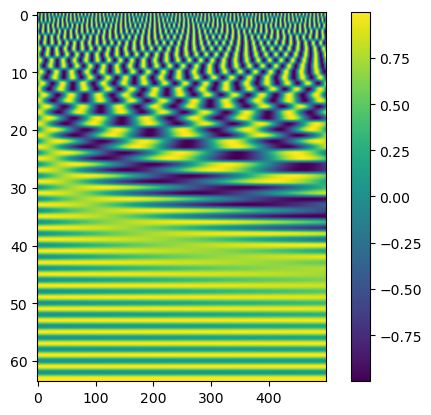

In [2]:
# testing sinusoidal positional embeddings
import numpy as np
import torch
def get_sinusoidal_time_embeddings(size,length,batch_size,range_param=100):
        position_enc = np.array([
            [pos / np.power(range_param, 2*i/size) for i in range(size)]
            if pos != 0 else np.zeros(size) for pos in range(length)])

        position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2]) # dim 2i
        position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2]) # dim 2i+1
        # now position_enc is size (length,size). need to flip
        position_enc = position_enc.T
        # repeat to right batch size
        position_enc = torch.unsqueeze(torch.tensor(position_enc),0)
        position_enc = position_enc.repeat(batch_size,1,1)
        return position_enc
stuff = get_sinusoidal_time_embeddings(64,500,32)
print(stuff.shape)
import matplotlib.pyplot as plt
plt.imshow(stuff[0],aspect=10)
plt.colorbar()

In [1]:
# testing adding positional attention to eqnet
# checking receptive field sizes 

import numpy as np
import torch
import matplotlib.pyplot as plt
from utilities.cleandiffuser.nn_diffusion import CNN1dShiftEq
from utilities.cleandiffuser.utils import report_parameters

# 25
model = CNN1dShiftEq(in_dim = 2, encode_position=True,use_timestep_emb=False)
model.to('cuda')
report_parameters(model)

Total parameters: 1.60 M
         conv_layers.25.conv1.weight: 53.25 k | Conv1d(64, 64, kernel_size=(13,), stride=(1,), padding=(6,), padding_mode=replicate)
         conv_layers.25.conv2.weight: 53.25 k | Conv1d(64, 64, kernel_size=(13,), stride=(1,), padding=(6,), padding_mode=replicate)
         conv_layers.20.conv1.weight: 45.06 k | Conv1d(64, 64, kernel_size=(11,), stride=(1,), padding=(5,), padding_mode=replicate)
         conv_layers.20.conv2.weight: 45.06 k | Conv1d(64, 64, kernel_size=(11,), stride=(1,), padding=(5,), padding_mode=replicate)
         conv_layers.21.conv1.weight: 45.06 k | Conv1d(64, 64, kernel_size=(11,), stride=(1,), padding=(5,), padding_mode=replicate)
         conv_layers.21.conv2.weight: 45.06 k | Conv1d(64, 64, kernel_size=(11,), stride=(1,), padding=(5,), padding_mode=replicate)
         conv_layers.22.conv1.weight: 45.06 k | Conv1d(64, 64, kernel_size=(11,), stride=(1,), padding=(5,), padding_mode=replicate)
         conv_layers.22.conv2.weight: 45.06 

1603228

torch.Size([16, 512, 2])
(16, 512, 2)


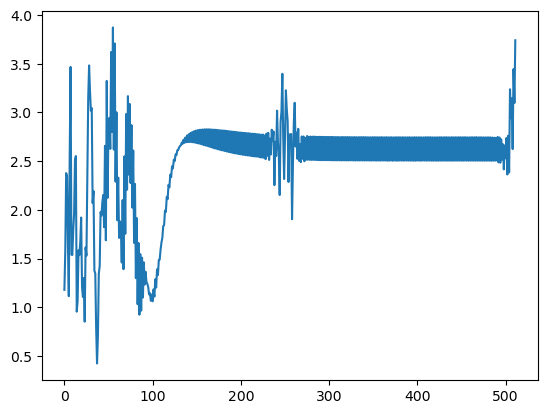

In [17]:
index = 250
fake_batch = torch.zeros((16,512,2),device="cuda")
fake_batch[:,index,:] = 400
#fake_batch = fake_batch.permute(0, 2, 1)
out = model(fake_batch,torch.tensor([0],device='cuda'),None)
#out.permute(0, 2, 1)
print(out.shape)
out = out.detach().cpu().numpy()
print(out.shape)
plt.plot(out[0,:,0])

In [2]:
# numpy checking thing
import numpy as np
test_array = np.zeros((256,2))
test_array = np.expand_dims(test_array,axis=1)
print(test_array.shape)

(256, 1, 2)


(-5.0, 105.0)

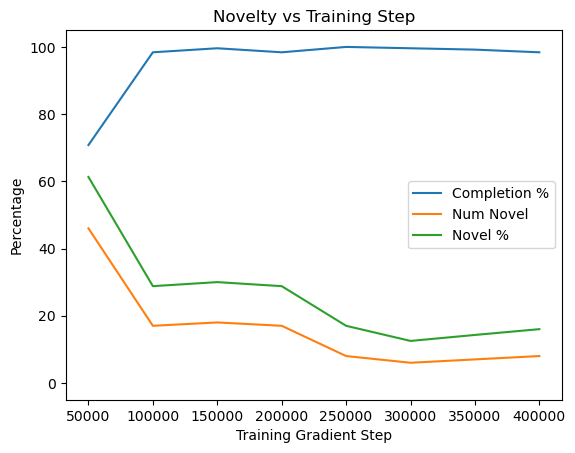

In [4]:
# quick and dirty plotting script for training progression vs novel generation stuff
training_steps = [50000,100000,150000,200000,250000,300000,350000,400000]
completion_percentage= [70.8,98.4,99.6,98.4,100,99.6,99.2,98.4]
num_novel = [46,17,18,17,8,6,7,8]
novel_percentage = [61.3,28.8,30.0,28.8,17,12.5,14.28,16]

import matplotlib.pyplot as plt

plt.plot(training_steps,completion_percentage,label='Completion %')
plt.plot(training_steps,num_novel,label='Num Novel')
plt.plot(training_steps,novel_percentage,label='Novel %')

plt.legend()
plt.xlabel('Training Gradient Step')
plt.ylabel('Percentage')
plt.title('Novelty vs Training Step')
plt.ylim(-5,105)

In [15]:
# checking receptive field sizes 

import numpy as np
import torch
import matplotlib.pyplot as plt
from utilities.cleandiffuser.nn_diffusion import CNN1dShiftEq
from utilities.cleandiffuser.utils import report_parameters

# 25
model = CNN1dShiftEq(in_dim = 2, kernel_expansion_range=8)
model.to('cuda')
report_parameters(model)

Total parameters: 1.13 M
         conv_layers.24.conv1.weight: 36.86 k | Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=(4,), padding_mode=replicate)
         conv_layers.24.conv2.weight: 36.86 k | Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=(4,), padding_mode=replicate)
         conv_layers.25.conv1.weight: 36.86 k | Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=(4,), padding_mode=replicate)
         conv_layers.25.conv2.weight: 36.86 k | Conv1d(64, 64, kernel_size=(9,), stride=(1,), padding=(4,), padding_mode=replicate)
         conv_layers.16.conv1.weight: 28.67 k | Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,), padding_mode=replicate)
         conv_layers.16.conv2.weight: 28.67 k | Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,), padding_mode=replicate)
         conv_layers.17.conv1.weight: 28.67 k | Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,), padding_mode=replicate)
         conv_layers.17.conv2.weight: 28.67 k | Con

1129770

torch.Size([16, 512, 2])
(16, 512, 2)


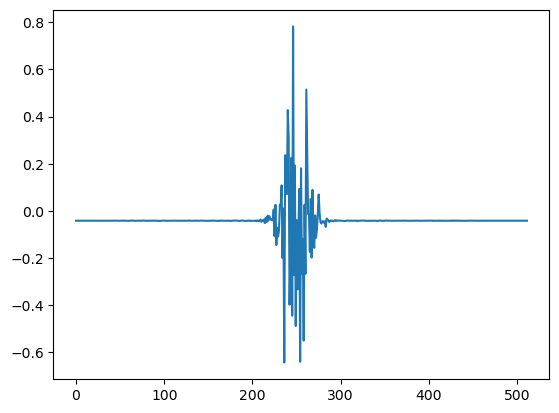

In [2]:
index = 250
fake_batch = torch.ones((16,512,2),device="cuda")
fake_batch[:,index,:] = 10
#fake_batch = fake_batch.permute(0, 2, 1)
out = model(fake_batch,None)
#out.permute(0, 2, 1)
print(out.shape)
out = out.detach().cpu().numpy()
print(out.shape)
plt.plot(out[0,:,0])

In [1]:
# trying to adapt convnext more or less directly

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
class Block(nn.Module):
    r""" ConvNeXt Block. There are two equivalent implementations:
    (1) DwConv -> LayerNorm (channels_first) -> 1x1 Conv -> GELU -> 1x1 Conv; all in (N, C, H, W)
    (2) DwConv -> Permute to (N, H, W, C); LayerNorm (channels_last) -> Linear -> GELU -> Linear; Permute back
    We use (2) as we find it slightly faster in PyTorch
    
    Args:
        dim (int): Number of input channels.
        drop_path (float): Stochastic depth rate. Default: 0.0
        layer_scale_init_value (float): Init value for Layer Scale. Default: 1e-6.
    """
    def __init__(self, dim, drop_path=0., layer_scale_init_value=1e-6):
        super().__init__()
        self.dwconv = nn.Conv1d(dim, dim, kernel_size=7, padding=3, groups=dim,padding_mode='replicate') # depthwise conv
        self.norm = LayerNorm(dim, eps=1e-6)
        #self.norm = LayerNorm2(dim)
        #self.norm = nn.Identity()
        self.pwconv1 = nn.Linear(dim, 4 * dim) # pointwise/1x1 convs, implemented with linear layers
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(4 * dim, dim)
        self.gamma = nn.Parameter(layer_scale_init_value * torch.ones((dim)), 
                                    requires_grad=True) if layer_scale_init_value > 0 else None
        self.drop_path = nn.Identity()

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 1) # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)
        if self.gamma is not None:
            x = self.gamma * x
        x = x.permute(0, 2, 1) # (N, H, W, C) -> (N, C, H, W)

        x = input + self.drop_path(x)
        return x

class ConvNeXt(nn.Module):
    
    def __init__(self, in_chans=2,
                 depths=[3, 3, 9, 3], dims=[96, 192, 384, 768], drop_path_rate=0., 
                 layer_scale_init_value=1e-6, ):
        super().__init__()

        self.downsample_layers = nn.ModuleList() # stem and 3 intermediate downsampling conv layers
        stem = nn.Sequential(
            nn.Conv1d(in_chans, dims[0], kernel_size=7, stride=1,padding=3,padding_mode='replicate'),
            LayerNorm(dims[0], eps=1e-6, data_format="channels_first")
            #LayerNorm2(dims[0])
        )
        self.downsample_layers.append(stem)
        for i in range(3):
            downsample_layer = nn.Sequential(
                    LayerNorm(dims[i], eps=1e-6, data_format="channels_first"),
                    #LayerNorm2(dims[i]),
                    nn.Conv1d(dims[i], dims[i+1], kernel_size=7, stride=1,padding=3,padding_mode='replicate'),
                    
            )
            self.downsample_layers.append(downsample_layer)

        self.stages = nn.ModuleList() # 4 feature resolution stages, each consisting of multiple residual blocks
        dp_rates=[x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))] 
        cur = 0
        for i in range(4):
            stage = nn.Sequential(
                *[Block(dim=dims[i], drop_path=dp_rates[cur + j], 
                layer_scale_init_value=layer_scale_init_value) for j in range(depths[i])]
            )
            self.stages.append(stage)
            cur += depths[i]

        #self.norm = nn.LayerNorm(dims[-1], eps=1e-6) # final norm layer
        self.norm = nn.Identity()

        self.final_conv = nn.Conv1d(dims[-1], in_chans, kernel_size=7, stride=1,padding=3,padding_mode='replicate')

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, (nn.Conv1d, nn.Linear)):
            trunc_normal_(m.weight, std=.02)
            nn.init.constant_(m.bias, 0)

    def forward_features(self, x):
        for i in range(4):
            #print(x.shape)
            x = self.downsample_layers[i](x)
            x = self.stages[i](x)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.final_conv(x)
        return x
def _trunc_normal_(tensor, mean, std, a, b):
    # Cut & paste from PyTorch official master until it's in a few official releases - RW
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.
    # Values are generated by using a truncated uniform distribution and
    # then using the inverse CDF for the normal distribution.
    # Get upper and lower cdf values
    l = norm_cdf((a - mean) / std)
    u = norm_cdf((b - mean) / std)

    # Uniformly fill tensor with values from [l, u], then translate to
    # [2l-1, 2u-1].
    tensor.uniform_(2 * l - 1, 2 * u - 1)

    # Use inverse cdf transform for normal distribution to get truncated
    # standard normal
    tensor.erfinv_()

    # Transform to proper mean, std
    tensor.mul_(std * math.sqrt(2.))
    tensor.add_(mean)

    # Clamp to ensure it's in the proper range
    tensor.clamp_(min=a, max=b)
    return tensor


def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
    # type: (Tensor, float, float, float, float) -> Tensor
    
    with torch.no_grad():
        return _trunc_normal_(tensor, mean, std, a, b)

class LayerNorm(nn.Module):
    r""" LayerNorm that supports two data formats: channels_last (default) or channels_first. 
    The ordering of the dimensions in the inputs. channels_last corresponds to inputs with 
    shape (batch_size, height, width, channels) while channels_first corresponds to inputs 
    with shape (batch_size, channels, height, width).
    """
    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise NotImplementedError 
        self.normalized_shape = (normalized_shape, )
    
    def forward(self, x):
        if self.data_format == "channels_last":
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)
            x = (x - u) / torch.sqrt(s + self.eps)
            x = self.weight[:, None] * x + self.bias[:, None]
            return x
def convnext_small(pretrained=False,in_22k=False, **kwargs):
    model = ConvNeXt(depths=[3, 3, 27, 3], dims=[96, 192, 384, 768], **kwargs)
    return model
def convnext_tiny(pretrained=False,in_22k=False, **kwargs):
    model = ConvNeXt(depths=[3, 3, 9, 3], dims=[96, 192, 384, 768], **kwargs)
    return model
def convnext_xlarge(**kwargs):
    model = ConvNeXt(depths=[3, 3, 27, 3], dims=[256, 512, 1024, 2048], **kwargs)
    return model

def convnext_base(pretrained=False, in_22k=False, **kwargs):
    model = ConvNeXt(depths=[3, 3, 27, 3], dims=[128, 256, 512, 1024], **kwargs)
    return model

def print_model_size(model):
    size_model = 0
    for param in model.parameters():
        if param.data.is_floating_point():
            size_model += param.numel() * torch.finfo(param.data.dtype).bits
        else:
            size_model += param.numel() * torch.iinfo(param.data.dtype).bits
    print(f"model size: {size_model} / bit | {size_model / 8e6:.2f} / MB")

torch.Size([12, 2, 512])
torch.Size([12, 2, 512])
model size: 918690880 / bit | 114.84 / MB


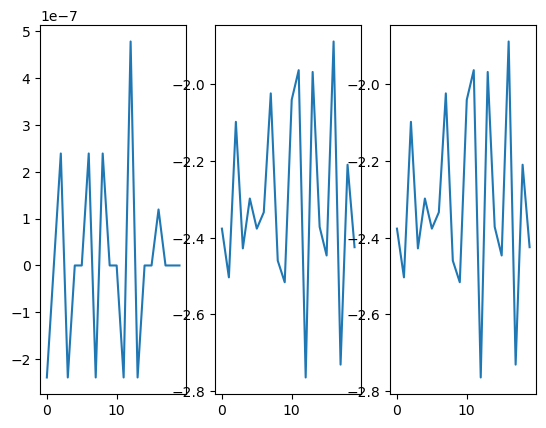

In [22]:
import numpy as np
model = convnext_tiny()
model.to('cuda')
# 25
index = 100
fake_batch = torch.ones((12,512,2),device="cuda")
fake_batch[:,index,:] = 2
fake_batch = fake_batch.permute(0, 2, 1)
out = model(fake_batch)
#out.permute(0, 2, 1)
print(out.shape)
out = out.detach().cpu().numpy()
out25 = np.copy(out)
# 45
index = 200
fake_batch = torch.ones((12,512,2),device="cuda")
fake_batch[:,index,:] = 2
fake_batch = fake_batch.permute(0, 2, 1)
out = model(fake_batch)
#out.permute(0, 2, 1)
print(out.shape)
out = out.detach().cpu().numpy()
out45 = np.copy(out)
import matplotlib.pyplot as plt
#print(out[0,:,0].shape)
fig,axes = plt.subplots(1,3)
axes[0].plot(out25[0,0,100-10:100+10] - out45[0,0,200-10:200+10])
axes[1].plot(out25[0,0,100-10:100+10])
axes[2].plot(out45[0,0,200-10:200+10])
print_model_size(model)

torch.Size([16, 2, 512])


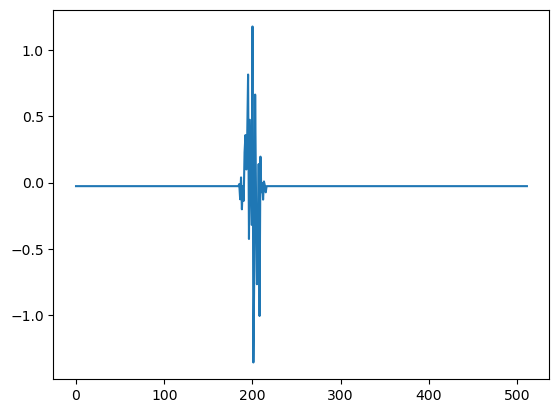

In [16]:
import numpy as np
# 25
index = 200
fake_batch = torch.ones((16,512,2),device="cuda")
fake_batch[:,index,:] = 10
fake_batch = fake_batch.permute(0, 2, 1)
out = model(fake_batch)
#out.permute(0, 2, 1)
print(out.shape)
out = out.detach().cpu().numpy()
out25 = np.copy(out)
plt.plot(out25[0,0,:])

In [41]:
# tooling around with groups
import numpy as np
import torch
import torch.nn as nn
conv = nn.Conv1d(in_channels=2, 
                 out_channels=50, 
                 kernel_size=7, 
                 stride=1, 
                 padding=3,
                 padding_mode='replicate',
                 device='cpu',
                 groups = 2)

conv2 = nn.Conv1d(in_channels=50, 
                 out_channels=50, 
                 kernel_size=7, 
                 stride=1, 
                 padding=3,
                 padding_mode='replicate',
                 device='cpu',
                 groups = 2)

conv3 = nn.Conv1d(in_channels=50, 
                 out_channels=2, 
                 kernel_size=7, 
                 stride=1, 
                 padding=3,
                 padding_mode='replicate',
                 device='cpu',
                 groups = 2)


torch.Size([12, 2, 64])
torch.Size([12, 2, 64])
torch.Size([50, 25, 7])


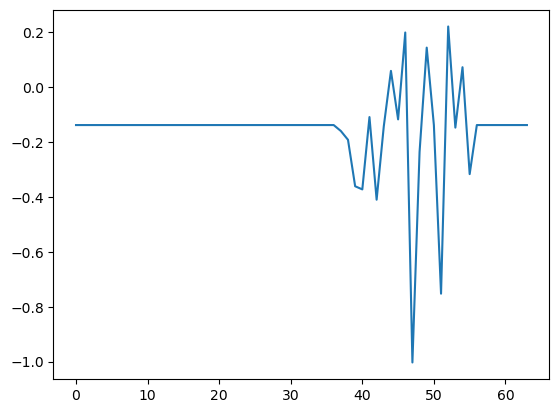

In [42]:
index = 46
fake_batch = torch.ones((12,64,2),device="cpu")
fake_batch[:,index,:] = 10
fake_batch = fake_batch.permute(0, 2, 1)

activation = nn.Mish()
out = conv3(conv2(conv(fake_batch)))
print(out.shape)

import matplotlib.pyplot as plt
print(out.shape)
plt.plot(out.cpu().detach().numpy()[:,0,:][0])
print(conv2.weight.shape)

In [37]:
# KILLL MEEEEEEEE
from typing import List, Optional

import einops
import numpy as np
import torch
import torch.nn as nn
conv = nn.Conv1d(in_channels=2, 
                 out_channels=50, 
                 kernel_size=9, 
                 stride=1, 
                 padding=4,padding_mode='replicate',device='cpu')

conv2 = nn.Conv1d(in_channels=50, 
                 out_channels=2, 
                 kernel_size=7, 
                 stride=1, 
                 padding=3,padding_mode='replicate',device='cpu')

class LayerNorm(nn.Module):
    def __init__(self, dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.g = nn.Parameter(torch.ones(1, dim, 1))
        self.b = nn.Parameter(torch.zeros(1, dim, 1))

    def forward(self, x):
        var = torch.var(x, dim=1, unbiased=False, keepdim=True)
        mean = torch.mean(x, dim=1, keepdim=True)
        return (x - mean) / (var + self.eps).sqrt() * self.g + self.b
layer_norm = LayerNorm(50)

torch.Size([12, 2, 64])


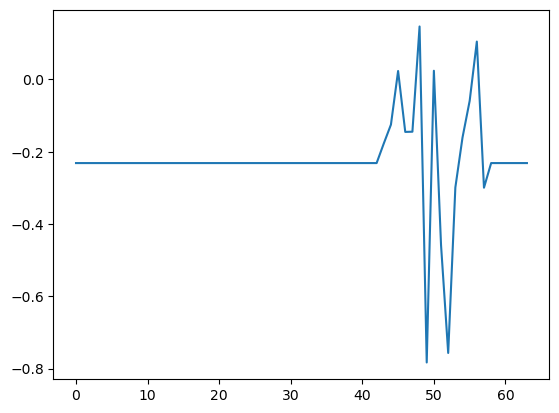

In [38]:
index = 50
fake_batch = torch.ones((12,64,2),device="cpu")
fake_batch[:,index,1] = 10
fake_batch = fake_batch.permute(0, 2, 1)

activation = nn.Mish()
out = conv2(activation(layer_norm(conv(fake_batch))))
import matplotlib.pyplot as plt
print(out.shape)
plt.plot(out.cpu().detach().numpy()[:,0,:][0])

In [4]:
# testing aps janner unet
from utilities.cleandiffuser.nn_diffusion import JannerUNet1d, JannerUNet1dShiftEq
from utilities.cleandiffuser.diffusion import DiscreteDiffusionSDE
from janner_diffuser import JannerDiffuserTrainConfig
import torch
# various stupid preliminary shit 
config = JannerDiffuserTrainConfig()
config.gen_horizon = 64
obs_dim = 2
fix_mask = torch.zeros((config.gen_horizon, obs_dim)) 
loss_weight = torch.ones((config.gen_horizon, obs_dim))
fake_batch = torch.zeros((1,64,obs_dim),device="cuda")

print('Testing Normal JannerUNet')
janner = JannerUNet1d(
        obs_dim, model_dim=config.model_dim, emb_dim=config.model_dim, dim_mult=[1, 2, 2, 2],
        timestep_emb_type="positional", attention=config.self_attention, kernel_size=5,
        use_timestep_emb=config.use_timestep_embeddings,norm_type='layernorm')

janner_agent = DiscreteDiffusionSDE(
        janner, None,
        fix_mask=fix_mask, loss_weight=loss_weight, classifier=None, ema_rate=config.ema_rate,
        device=config.device, diffusion_steps=config.diffusion_steps, predict_noise=config.predict_noise)
janner_agent.update(fake_batch)
print('Normal JannerUNet Validated')

print('Testing JannerUNet w/out pooling ')

janner_aps = JannerUNet1dShiftEq(obs_dim,n_layers = 20)
janner_aps_agent = DiscreteDiffusionSDE(
        janner_aps, None,
        fix_mask=fix_mask, loss_weight=loss_weight, classifier=None, ema_rate=config.ema_rate,
        device=config.device, diffusion_steps=config.diffusion_steps, predict_noise=config.predict_noise)
janner_aps_agent.update(fake_batch)
print('JannerUNet w/out pooling Validated')



Testing Normal JannerUNet
Normal JannerUNet Validated
Testing JannerUNet w/out pooling 
JannerUNet w/out pooling Validated


[2.0651014 2.0651019 2.0651023 2.0651026 2.0650826 2.0650823 2.0650742
 2.0652664 2.0664873 2.064415  2.0656123 2.06777   2.0571828 2.059746
 2.055259  1.9793794 2.1005719 2.0733538 2.1867054 2.1072373 2.0569057
 2.1652672 1.8230039 1.9064714 2.0395672 2.4482942 1.9183222 2.295534
 2.0579338 2.106156  2.2289214 2.0019028 2.0835137 1.9223742 2.0674999
 2.1132581 2.0335593 2.0319533 2.0566528 2.0887995 2.0688162 2.0508897
 2.0705442 2.0651267 2.0655532 2.0651748 2.0654166 2.0650513 2.065048
 2.0650856 2.065089  2.0650997 2.0651026 2.0651011 2.0651011 2.065101
 2.065101  2.0651011 2.0651011 2.065101  2.0651011 2.0651011 2.0651011
 2.0651011]


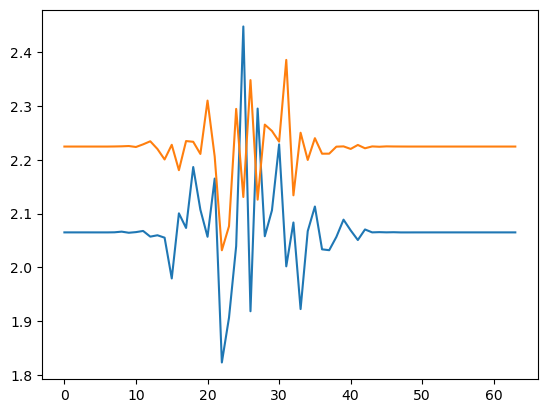

In [15]:
index = 26
fake_batch = torch.zeros((1,64,obs_dim),device="cuda")
fake_batch[:,index,0] = 100
output = janner_aps(fake_batch,torch.tensor((0,),device='cuda'))
#output = janner(fake_batch,torch.tensor((0,),device='cuda'))
import matplotlib.pyplot as plt
plt.plot(output.cpu().detach().numpy()[:,:,:][0])
#plt.plot(output.cpu().detach().numpy()[:,:,:][0])
print(output.cpu().detach().numpy()[:,:,0][0])

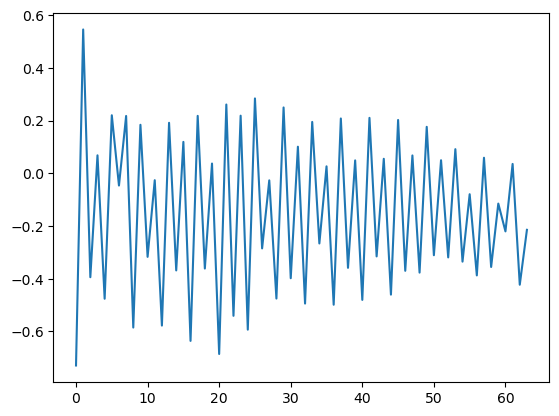

In [6]:
index = 19
fake_batch = torch.zeros((1,64,obs_dim),device="cuda")
fake_batch[:,index,:] = 1.0
output = janner(fake_batch,torch.tensor((1,),device='cuda'))
import matplotlib.pyplot as plt
plt.plot(output.cpu().detach().numpy()[:,:,0][0])

In [2]:
# some python fuckery in cleandiffuser I don't really understand\
import numpy as np
dim_mult = [1, 2, 2, 2]
in_dim = 2
model_dim = 32
dims = [in_dim] + [model_dim * m for m in np.cumprod(dim_mult)]
print(dims)

[2, 32, 64, 128, 256]


In [8]:
# checking out variance in smth
import numpy as np
print('500')
stuff = [0.16,0.14285714285714285,0.14285714285714285,0.20754716981132076,0.19230769230769232,0.16,0.14285714285714285,0.10638297872340426,0.19230769230769232,0.14285714285714285]
std = np.sqrt(np.var(stuff))
mean = np.mean(stuff)
print('std',np.sqrt(np.var(stuff)))
print('mean+-std',mean+std,mean-std)
print()

print('250')

stuff = [0.10869,0.0666,0.1086,0.09090,0.142857,0.16,0.066666,0.10638,0.1428571,0.08695]
std = np.sqrt(np.var(stuff))
mean = np.mean(stuff)
print('std',np.sqrt(np.var(stuff)))
print('mean+-std',mean+std,mean-std)

500
std 0.02896299473176116
mean+-std 0.18796040518962925 0.1300344157261069

250
std 0.030488416514159927
mean+-std 0.13853842651415993 0.07756159348584007


*** toy data tests ***
1
3
*** real data tests ***


Processing trajectories: 100%|██████████| 25000/25000 [00:00<00:00, 1267207.27it/s]


(50, 500, 2)
42


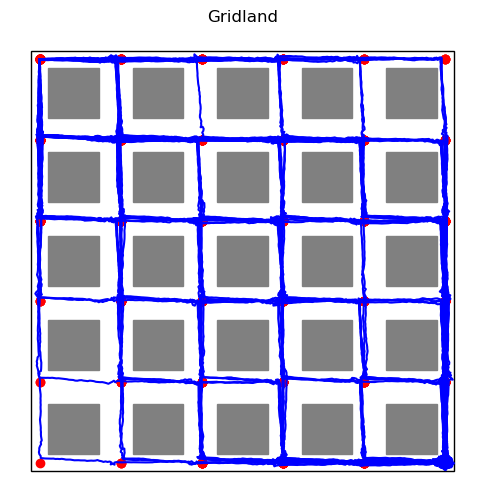

In [4]:
# testing diveristy metric thing
from utilities.gridland_environment import *
import numpy as np
print('*** toy data tests ***')
sample_data = np.random.normal(size=(25,2))
traj_1 = [sample_data] * 3
traj_2 = [sample_data,sample_data*2,sample_data*3]
print(len(get_trajectory_sets(traj_1)))
print(len(get_trajectory_sets(traj_2)))
print('*** real data tests ***')
import numpy as np 
from utilities.gridland_environment import *
from utilities.ogbench_utilities import GCSequenceDataset
from janner_diffuser import JannerDiffuserTrainConfig
config = JannerDiffuserTrainConfig()
config.horizon = 500
config.gen_horizon = 512
config.goal_sample_gamma = 0.99
config.allow_partial_subsamples = False
config.goal_padding = False
envs, dataset, _ = make_envs_and_datasets_gridland(n_size=5,num_envs = config.num_envs)
env = GridLand(n_size=5,timeout = 500)
env.reset()
fig, ax = env.get_mpl_plot()
train_dataset = GCSequenceDataset(dataset, config) # new sequence dataset
batch = train_dataset.sample(idxs=range(50))
#batch = train_dataset.sample()
print(batch['observations'].shape)
traj_visitations = []
for trajectory in batch['observations']:
    visited_intersections, visited_intersections_idx = find_trajectory_keypoints(trajectory,env)
    traj_visitations.append(visited_intersections_idx)
    #print(trajectory)
    ax.plot(trajectory[:,0],trajectory[:,1],label='traj',color='blue')
    ax.scatter(visited_intersections[:,0],visited_intersections[:,1],label='visited',color='red')
print(len(get_trajectory_sets(traj_visitations)))



In [ ]:
# seeing how python sets work
thing = [(5,6),(5,6),(5,6),(5,6)]
print(set(thing))
import numpy as np
tuple(np.array([[5,6]]))

{(5, 6)}


In [2]:
# mking sure if horizon is already OO2 it won't pad
# FUCK 
import numpy as np
2 ** (int(np.log2(255 )) + 1) # find next higher power of 2

256

In [1]:
# testing the flatland dataloader 
import numpy as np 
from utilities.gridland_environment import *
from utilities.ogbench_utilities import GCSequenceDataset
from janner_diffuser import JannerDiffuserTrainConfig
config = JannerDiffuserTrainConfig()
config.horizon = 128
config.goal_sample_gamma = 0.99
envs, dataset, _ = make_envs_and_datasets_gridland(n_size=2,num_envs = config.num_envs)
train_dataset = GCSequenceDataset(dataset, config) # new sequence dataset

Processing trajectories: 100%|██████████| 100000/100000 [00:00<00:00, 1368487.27it/s]


In [2]:
batch = train_dataset.sample()

In [5]:
import numpy as np
thing = np.array([[1,2,3,4,5],[1,2,3,4,5]])
print(thing.shape)
print(thing)
padding = np.pad(thing,((0,5),(0,0)),mode='edge')
print(padding.shape)

(2, 5)
[[1 2 3 4 5]
 [1 2 3 4 5]]
(7, 5)


In [12]:
import numpy as np
thing = np.array([1,2,3,4,5])
print(thing.shape)
print(thing)
print(np.pad(thing,((0,5)),mode='edge'))

(5,)
[1 2 3 4 5]
[1 2 3 4 5 5 5 5 5 5]


In [39]:
# torch tensor fuckery
import torch
import numpy as np
thing = torch.zeros((5,10,2))
thing[0,:] = 1
thing[1,:] = 2
thing[2,:] = 3
thing[3,:] = 4
thing[4,:] = 5

another_thing = []
for i in range(10):
    temp = np.ones((5,2))
    temp[0] = 1
    temp[1] = 2
    temp[2] = 3
    temp[3] = 4
    temp[4] = 5
    another_thing.append(temp)
another_thing = torch.transpose(torch.tensor(np.array(another_thing)),0,1)
#print(thing.shape)
#print(another_thing.shape)
print(thing == another_thing)


tensor([[[True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True]],

        [[True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True]],

        [[True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True]],

        [[True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True],
         [True, True]],

        [[True, True],
         [True, True],
         [True, True],
   

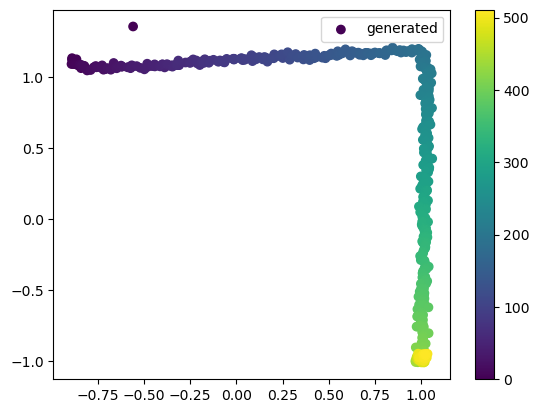

In [ ]:
# testing inpainting from mid-sample generation just to be sure
import os
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import uuid
import pyrallis
from tqdm import tqdm

from torch.optim.lr_scheduler import CosineAnnealingLR
from dataclasses import asdict, dataclass
from utilities.cleandiffuser.diffusion import DiscreteDiffusionSDE
from utilities.cleandiffuser.nn_diffusion import JannerUNet1d
from utilities.cleandiffuser.utils import report_parameters
from utilities.ogbench_utilities import set_seed
from utilities.cleandiffuser.diffusion import ddpm
from utilities.cleandiffuser.invdynamic import MlpInvDynamic
from typing import Optional
from utilities.ogbench_utilities import *
from utilities.flatland_plus_environment import *
from utilities.gridland_environment import * 
from utilities.toy_env_utilities import ToyEnvInvDyn
from janner_diffuser import JannerDiffuserTrainConfig
config = JannerDiffuserTrainConfig()
env = 'gridland'
n_size = 10
memory = 512
horizon = 512 # for generation so must be power of 2
num_envs = 32
num_episodes = 1.0
temperature = 0.5
n_exec_steps = 64
render = True
config.temperature = temperature
config.memory = 500
config.horizon = horizon
config.num_envs = num_envs
config.num_episodes = num_episodes
config.n_exec_steps = n_exec_steps
config.env = env
config.inpaint = True
config.gridland = True
config.n_size = n_size
config.pad = False
config.gen_horizon = horizon
config.toy_env = True
config.open_loop_invdyn = False
config.batch_size = 128
config.goal_padding = False
config.predict_noise = True

envs, dataset, _ = make_envs_and_datasets_gridland(n_size=config.n_size,num_envs = config.num_envs,single_env=False)
obs_dim, act_dim = envs.single_observation_space.shape[0], envs.single_action_space.shape[0]
nn_diffusion = JannerUNet1d(
        obs_dim, model_dim=config.model_dim, emb_dim=config.model_dim, dim_mult=[1, 2, 2, 2],
        timestep_emb_type="positional", attention=False, kernel_size=5)


# ----------------- Masking -------------------
# NOTE - not sure what any of this does (should figure out!)
fix_mask = torch.zeros((config.horizon, obs_dim)) 
fix_mask[0, :] = 1. # for the starting/current state
loss_weight = torch.ones((config.horizon, obs_dim))

# --------------- difuse --------------------
agent = DiscreteDiffusionSDE(
        nn_diffusion, None,
        fix_mask=fix_mask, loss_weight=loss_weight, classifier=None, ema_rate=config.ema_rate,
        device=config.device, diffusion_steps=config.diffusion_steps, predict_noise=config.predict_noise)
#agent.load('trained_models/JannerInpaint-gridland-n10-1de25490diffusion_ckpt_latest.pt')
agent.load('trained_models/JannerInpaint-Noise-gridland-n10-3ed0454ediffusion_ckpt_latest.pt')
 
agent.eval()
prior = torch.zeros((1, 512, obs_dim), device=config.device) # size (num_envs, config.horizon, obs_dim)
fake_traj = np.array(dataset["observations"][150:200])
fake_traj = fake_traj + np.random.normal(size=fake_traj.shape,loc=0,scale=00)

fake_traj = torch.tensor((fake_traj),device=config.device)
fake_traj = fake_traj[np.newaxis,:]
prior[:, :50, :obs_dim] = fake_traj # inpaints start state at beginning of trajectory
# modifies agent mask to account for history
fix_mask = agent.fix_mask 
fix_mask[:,:50, :] = 0.
agent.fix_mask = fix_mask

traj, log = agent.sample(
prior,
solver='ddpm',
n_samples=config.num_envs,
sample_steps=config.sampling_steps,
use_ema=config.use_ema, w_cg=config.w_cg, temperature=config.temperature)

prior = prior.cpu().numpy()
traj = traj.cpu().numpy()
#plt.scatter(prior[0,:,0],prior[0,:,1],label='prior' ,zorder=10)
plt.scatter(traj[0,:,0],traj[0,:,1],label='generated' ,zorder=5,c=range(len(traj[0,:,0])))
plt.colorbar()
plt.legend()

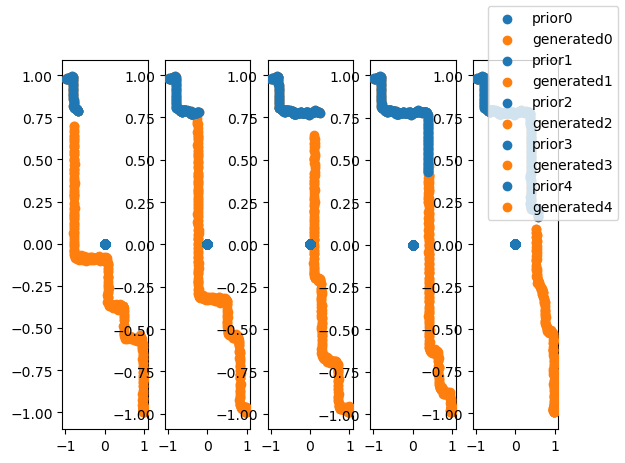

In [46]:
# testing why the sampling prior thing is all busteredo 
# imports, parameters, environment, etc.
import os
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import uuid
import pyrallis
from tqdm import tqdm

from torch.optim.lr_scheduler import CosineAnnealingLR
from dataclasses import asdict, dataclass
from utilities.cleandiffuser.diffusion import DiscreteDiffusionSDE
from utilities.cleandiffuser.nn_diffusion import JannerUNet1d
from utilities.cleandiffuser.utils import report_parameters
from utilities.ogbench_utilities import set_seed
from utilities.cleandiffuser.diffusion import ddpm
from utilities.cleandiffuser.invdynamic import MlpInvDynamic
from typing import Optional
from utilities.ogbench_utilities import *
from utilities.flatland_plus_environment import *
from utilities.gridland_environment import * 
from utilities.toy_env_utilities import ToyEnvInvDyn
from janner_diffuser import JannerDiffuserTrainConfig
config = JannerDiffuserTrainConfig()
env = 'gridland'
n_size = 10
memory = 512
horizon = 512 # for generation so must be power of 2
num_envs = 32
num_episodes = 1
temperature = 0.5
n_exec_steps = 64
render = True
config.memory = 500
config.horizon = horizon
config.num_envs = num_envs
config.num_episodes = num_episodes
config.n_exec_steps = n_exec_steps
config.env = env
config.inpaint = True
config.gridland = True
config.n_size = n_size
config.pad = False
config.gen_horizon = horizon
config.toy_env = True
config.open_loop_invdyn = False
config.batch_size = 128
config.goal_padding = False

envs, dataset, _ = make_envs_and_datasets_gridland(n_size=config.n_size,num_envs = config.num_envs,single_env=False)
obs_dim, act_dim = envs.single_observation_space.shape[0], envs.single_action_space.shape[0]
nn_diffusion = JannerUNet1d(
        obs_dim, model_dim=config.model_dim, emb_dim=config.model_dim, dim_mult=[1, 2, 2, 2],
        timestep_emb_type="positional", attention=False, kernel_size=5)


# ----------------- Masking -------------------
# NOTE - not sure what any of this does (should figure out!)
fix_mask = torch.zeros((config.horizon, obs_dim)) 
fix_mask[0, :] = 1. # for the starting/current state
loss_weight = torch.ones((config.horizon, obs_dim))

# --------------- difuse --------------------
agent = DiscreteDiffusionSDE(
        nn_diffusion, None,
        fix_mask=fix_mask, loss_weight=loss_weight, classifier=None, ema_rate=config.ema_rate,
        device=config.device, diffusion_steps=config.diffusion_steps, predict_noise=config.predict_noise)
agent.load('trained_models/JannerInpaint-gridland-n10-1de25490diffusion_ckpt_latest.pt')

fig, ax = plt.subplots(1,5)
agent.eval()
for i in range(5):
        prior = torch.zeros((1, 512, obs_dim), device=config.device) # size (num_envs, config.horizon, obs_dim)
        history_len = (i+1)*50
        fake_traj = np.array(dataset["observations"][:history_len])
        fake_traj = fake_traj + np.random.normal(size=fake_traj.shape,loc=0,scale=00)

        fake_traj = torch.tensor((fake_traj),device=config.device)
        fake_traj = fake_traj[np.newaxis,:]
        prior[:, :history_len, :obs_dim] = fake_traj # inpaints start state at beginning of trajectory
        # modifies agent mask to account for history
        fix_mask = agent.fix_mask 
        fix_mask[:,:history_len, :] = 1. 
        agent.fix_mask = fix_mask

        traj, log = agent.sample(
        prior,
        solver='ddpm',
        n_samples=config.num_envs,
        sample_steps=config.sampling_steps,
        use_ema=config.use_ema, w_cg=config.w_cg, temperature=config.temperature)

        prior = prior.cpu().numpy()
        traj = traj.cpu().numpy()
        ax[i].scatter(prior[0,:,0],prior[0,:,1],label='prior' + str(i),zorder=10)
        ax[i].scatter(traj[0,:,0],traj[0,:,1],label='generated' + str(i),zorder=5)
fig.legend()

100%|██████████| 1/1 [00:00<00:00, 18.10it/s]


(500, 2)
(500,)
(500, 2)


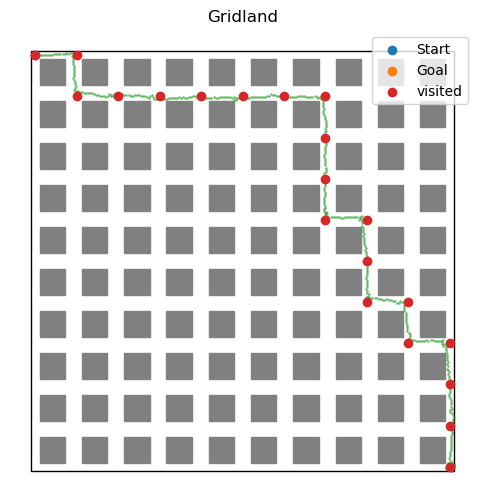

In [1]:
# testing keypoint trajectory whatever thing you call it 
# Imports, parameters, etc. 

### collects for single S-G pair - from top left to bottom right. 
# randomly varies which direction to go at keypoints
from utilities.gridland_environment import *
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt


# various parameters
MAX_EP_LENGTH = 500 # should take ~450 steps 
TOTAL_SAMPLES =  500 # OGBench had 1 million this seems reasonable eh
HOLDOUT_SPLIT = 0.3333
RANDOM_SEED = 42
save_directory = 'gridland_data'
SIZE = 10
keypoint_tolerance = 0.025 # for now set to same as env's goal tolerance who cares
gaussian_scale = 0.025 # random noise during action collection
save_directory = 'gridland_data'

# creates and resets the environment
env = GridLand(n_size=SIZE,timeout = MAX_EP_LENGTH)

# starts trajectory recording storage
obs_record = []
term_record = []
act_record = []

action = np.array((1,-1))
generator = np.random.default_rng(seed=RANDOM_SEED)
for episode in trange(int(TOTAL_SAMPLES/MAX_EP_LENGTH)):
    # initializes keypoint to wayfind to
    keypoint_ind = np.array([0,env.n_size])
    if generator.random() > 0.5:
        keypoint_ind[0] += 1
    else:
        keypoint_ind[1] -= 1
    keypoint = np.array((env.keypoints[keypoint_ind[0]],env.keypoints[keypoint_ind[1]]))
    at_keypoint = False
    truncated = False
    state, info = env.reset(start_idx='T0',goal_idx='B' + str(SIZE))
    while not truncated:
        obs_record.append(state)
        at_keypoint = np.linalg.norm(keypoint-state) <= keypoint_tolerance
        if at_keypoint:
            if keypoint_ind[0] < env.n_size and keypoint_ind[1] > 0:
                if generator.random() > 0.5 :
                    keypoint_ind[0] += 1
                else:
                    keypoint_ind[1] -= 1
            elif keypoint_ind[0] < env.n_size:
                keypoint_ind[0] += 1
            elif keypoint_ind[1] > 0:
                keypoint_ind[1] -= 1
            keypoint = np.array((env.keypoints[keypoint_ind[0]],env.keypoints[keypoint_ind[1]]))
        action = keypoint - state
        # adds small gaussian noise 
        action = action + generator.normal(loc=0,scale=gaussian_scale,size=action.shape)
        state, _, terminated, truncated, info = env.step(action)
        # recording
        term_record.append(truncated) # why this? sequence loader uses terminations as signs of traj. demarkation
        act_record.append(action)
fig, ax = env.get_mpl_plot()
obs_record = np.array(obs_record)
term_record = np.array(term_record)
act_record = np.array(act_record)
print(obs_record.shape)
print(term_record.shape)
print(act_record.shape)
# shows a little bit of visualization
for episode in range(int(1)):
    ax.scatter(obs_record[episode*MAX_EP_LENGTH:(episode+1)*MAX_EP_LENGTH,0],
               obs_record[episode*MAX_EP_LENGTH:(episode+1)*MAX_EP_LENGTH,1],s=1,alpha=0.5)

visited_intersections,_ = find_trajectory_keypoints(obs_record, env)
#print(visited_intersections.shape)
ax.scatter(visited_intersections[:,0],visited_intersections[:,1],label='visited')
#print(visited_intersections)
ax.legend()

In [1]:
import numpy as np
np.log2(512)

9.0

In [3]:
480/(2**4)

30.0

In [19]:
# padding
import numpy as np
n_samples = 500
obs = np.random.normal(size=(64,n_samples,2)) # batch, samples, obs_dim
new_length = 2 ** (int(np.log2(n_samples )) + 1)
obs = np.concatenate((obs,np.ones_like(obs)*obs[:,-1:,:]),axis=1)[:,:new_length]
print(obs.shape)
print(obs[0,-20:])

(64, 512, 2)
[[-0.58076774  0.13136584]
 [ 0.38300731 -0.90419418]
 [-0.43958309  0.91811276]
 [ 0.53906758 -0.31429778]
 [ 0.56835452  1.25226449]
 [-0.0835822   0.86156697]
 [-1.26336057 -1.36880923]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]
 [-0.03667708  1.65032589]]


In [6]:
# Imports, parameters, etc. 
from utilities.flatland_plus_environment import FlatLandPlus
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
MAX_EP_LENGTH = 200
TOTAL_SAMPLES = 100_000 # OGBench had 1 million but this seems more reasonable for this
HOLDOUT_SPLIT = 0.3333
RANDOM_SEED = 42
save_directory = 'flatland_data'
N_list = [2]
SIZE = 5
N = 2
# Collects and shuffles all possible Start-Goal pairs, sorts into 
# training and testing
sg_pairs = []
n_facets = N * 2 
for start_index in range(n_facets):
    for goal_index in range(n_facets):
        if start_index != goal_index:
            sg_pairs.append(tuple((start_index,goal_index)))
rng = np.random.default_rng(seed=RANDOM_SEED)
rng.shuffle(sg_pairs)
training_split = sg_pairs[:1-int(HOLDOUT_SPLIT*len(sg_pairs))]
testing_split = sg_pairs[1-int(HOLDOUT_SPLIT*len(sg_pairs)):]
assert len(sg_pairs) == len(training_split) + len(testing_split)
#print('train',training_split)
#print('test',testing_split)
# some setup stuff
timeout = MAX_EP_LENGTH
env = FlatLandPlus(n_dims = N)
n_sg_pairs = int(n_facets * (n_facets-1))
rng = np.random.default_rng(seed = 42)
gaussian_scale = 0.05
sg_index = 0
train_trajectories = []
test_trajectories = []
for sg_index in range(len(training_split)):
    # setup
    (start_index, goal_index) = training_split[sg_index]
    been_to_middle = False
    obs, info = env.reset(start_idx=start_index,goal_idx=goal_index)
    start = obs
    goal = info['goal']
    middle = np.zeros_like(start)
    truncated = False
    traj = [obs]
    # overall environment interaction loop
    while not truncated:
        if not been_to_middle: # travelling from start to middle
            # base action going towards middle
            action = middle-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        else: # travelling from middle to goal
            # base action going towards goal
            action = goal-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        # executes action
        obs, _ , _, truncated, _ = env.step(action)
        traj.append(obs)
        if np.linalg.norm(obs) < env.tolerance:
            been_to_middle = True
    # sg index handling
    train_trajectories.append(np.array(traj))
for sg_index in range(len(testing_split)):
    # setup
    (start_index, goal_index) = testing_split[sg_index]
    been_to_middle = False
    obs, info = env.reset(start_idx=start_index,goal_idx=goal_index)
    start = obs
    goal = info['goal']
    middle = np.zeros_like(start)
    truncated = False
    traj = [obs]
    # overall environment interaction loop
    while not truncated:
        if not been_to_middle: # travelling from start to middle
            # base action going towards middle
            action = middle-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        else: # travelling from middle to goal
            # base action going towards goal
            action = goal-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        # executes action
        obs, _ , _, truncated, _ = env.step(action)
        traj.append(obs)
        if np.linalg.norm(obs) < env.tolerance:
            been_to_middle = True
    # sg index handling
    test_trajectories.append(np.array(traj))

all_trajectories = np.array(test_trajectories + train_trajectories)
double_all = np.array(test_trajectories + train_trajectories+test_trajectories + train_trajectories)
train_trajectories = np.array(train_trajectories)
test_trajectories = np.array(test_trajectories)


In [7]:
print(train_trajectories.shape)
print(test_trajectories.shape)
print(double_all.shape)
print(all_trajectories.shape)

(10, 201, 2)
(2, 201, 2)
(24, 201, 2)
(12, 201, 2)


In [ ]:
# testing diversity metrics. ideally, in this case, total > train > test

# directly applying inception
# calculate inception score in numpy
from numpy import asarray
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import exp
 
# calculate the inception score for p(y|x)
def calculate_inception_score(p_yx, eps=1E-16):
	# calculate p(y)
	p_y = expand_dims(p_yx.mean(axis=0), 0)
	# kl divergence for each image
	kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
	# sum over classes
	sum_kl_d = kl_d.sum(axis=1)
	# average over images
	avg_kl_d = mean(sum_kl_d)
	# undo the logs
	is_score = exp(avg_kl_d)
	return is_score
print('Inception Train:',calculate_inception_score(train_trajectories))

[[[ 5.00000000e-02  5.00000000e-02]
  [ 4.88858031e-02  4.91492007e-02]
  [ 4.79989758e-02  4.82230896e-02]
  [ 4.70846926e-02  4.69660967e-02]
  [ 4.58309444e-02  4.56693733e-02]
  [ 4.48589952e-02  4.44100089e-02]
  [ 4.38352083e-02  4.37631077e-02]
  [ 4.27190360e-02  4.25681483e-02]
  [ 4.10641257e-02  4.17457119e-02]
  [ 4.03863423e-02  4.07888147e-02]
  [ 3.93935288e-02  3.98314688e-02]
  [ 3.84800579e-02  3.86847636e-02]
  [ 3.72620566e-02  3.72850597e-02]
  [ 3.58478311e-02  3.61245934e-02]
  [ 3.47380466e-02  3.50092809e-02]
  [ 3.41578152e-02  3.44389677e-02]
  [ 3.30135397e-02  3.38177247e-02]
  [ 3.16009438e-02  3.26409079e-02]
  [ 3.07504677e-02  3.18281878e-02]
  [ 2.93145077e-02  3.11029874e-02]
  [ 2.87562800e-02  3.00012584e-02]
  [ 2.76672024e-02  2.93824108e-02]
  [ 2.68924462e-02  2.85797010e-02]
  [ 2.58732217e-02  2.78420259e-02]
  [ 2.57756723e-02  2.64567105e-02]
  [ 2.51026056e-02  2.56319634e-02]
  [ 2.44296061e-02  2.47340532e-02]
  [ 2.42580068e-02  2.422413

/tmp/ipykernel_732532/2319024361.py:17: RuntimeWarning: invalid value encountered in log
  kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))


In [4]:
dictionary = {'meow':'woof'}
print('meow' in dictionary)

True


In [7]:
# how does numpy handle out of indexing
import numpy as np
thing = np.array([1,2,3,4,5])
another_thing = np.copy(thing)
another_thing[2:] = 9
print(thing)

[1 2 3 4 5]


[121, 24, 79, 5, 159, 22, 1, 83, 290, 45]


(array([699., 214.,  62.,  19.,   5.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.1830e+02, 2.3560e+02, 3.5290e+02, 4.7020e+02,
        5.8750e+02, 7.0480e+02, 8.2210e+02, 9.3940e+02, 1.0567e+03,
        1.1740e+03]),
 <BarContainer object of 10 artists>)

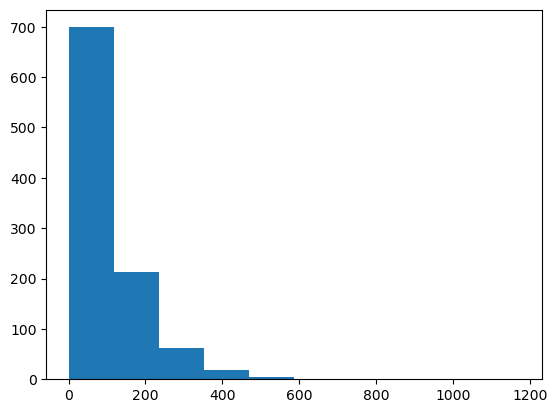

In [2]:
# more numpy random stuff
import numpy as np
stuff = []
for i in range(1000):
    stuff.append(np.random.geometric(p=0.01))
import matplotlib.pyplot as plt
print(stuff[:10])
plt.hist(stuff)

In [ ]:
# basic thing showing how rendering works
config = JannerDiffuserTrainConfig()
config.memory = memory
config.horizon = horizon
config.num_envs = num_envs
config.num_episodes = num_episodes
config.n_exec_steps = n_exec_steps
config.env = env
config.inpaint = True
envs = make_env_and_datasets(config.env,compact_dataset=False,env_only=True,render_mode=None)
envs.reset()
thing = envs.render()
print(thing.shape)
import matplotlib.pyplot as plt
plt.imshow(thing)

In [16]:
# grabbing relevant file path automatically
import glob
dir = 'trained_models'
name = 'JannerInpaint'
env = 'cube-quadruple-play-v0'
stuff = glob.glob(dir + '/' + name + '*' + env + '*' + 'latest.pt')
print(stuff)

['trained_models/JannerInpaint-cube-quadruple-play-v0-90a875d7diffusion_ckpt_latest.pt']


In [ ]:
# testing some stuff about OG's env loader
# imports, parameters, environment, etc.
from utilities.ogbench_utilities import *
from janner_diffuser import JannerDiffuserTrainConfig
env = 'scene-play-v0'
# env = 'cube-quadruple-play-v0'
# env = 'pointmaze-giant-stitch-v0'

memory = 20
horizon = 1024
num_envs = 1
num_episodes = 1
temperature = 0.5
n_exec_steps = 10
render = True
# if doing flatland stuff
flatland = False
n_dims = 2
# loads config, modifies to work w/given parameters
config = JannerDiffuserTrainConfig()
config.memory = memory
config.horizon = horizon
config.num_envs = num_envs
config.num_episodes = num_episodes
config.n_exec_steps = n_exec_steps
config.env = env
config.inpaint = True
envs = make_envs_and_datasets(config.env,compact_dataset=False,num_envs = config.num_envs,env_only=True)
task_id = envs.get_attr('cur_task_id')[0]
obs, info = envs.reset(options = {'task_id': task_id})


/root/miniconda3/envs/ogbench/lib/python3.9/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/root/miniconda3/envs/ogbench/lib/python3.9/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [2]:
# testing the flatland dataloader 
import numpy as np 
from utilities.flatland_plus_environment import *
from utilities.ogbench_utilities import GCSequenceDataset
from decision_diffuser import DecisionDiffuserTrainConfig
config = DecisionDiffuserTrainConfig()
config.horizon = 128
config.goal_sample_gamma = 0.99
envs, dataset, _ = make_envs_and_datasets_flatland(n_dims=2,num_envs = config.num_envs)
train_dataset = GCSequenceDataset(dataset, config) # new sequence dataset

Processing trajectories: 100%|██████████| 100000/100000 [00:00<00:00, 1391828.82it/s]


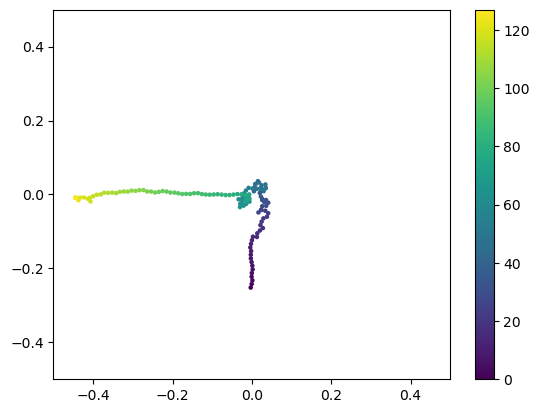

In [3]:
import matplotlib.pyplot as plt
batch = train_dataset.sample()
path_record = batch['observations'][0]
plt.scatter(path_record[:,0],path_record[:,1],c=range(len(path_record)),s=5)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.colorbar()
#print(path_record)

In [1]:
import numpy as np
thing = np.array([0,1,2,3,4,5])
print(thing[2:])

[2 3 4 5]


In [3]:
# random crackpot idea about fourier features I had I want to check 
# testing new sequence dataset
from utilities.ogbench_utilities import *
from gcbc import GCBCTrainConfig
config = GCBCTrainConfig()
config.batch_size = 1
config.horizon = 500
env_name = 'cube-single-play-v0' 
env, dataset, _ = make_env_and_datasets(env_name,compact_dataset=False)
seq_dataset = GCSequenceDataset(dataset, config)
batch = seq_dataset.sample()
print(batch['actions'].shape)

Processing trajectories: 100%|██████████| 1000000/1000000 [00:00<00:00, 1657707.76it/s]

(1, 500, 5)


(500,)


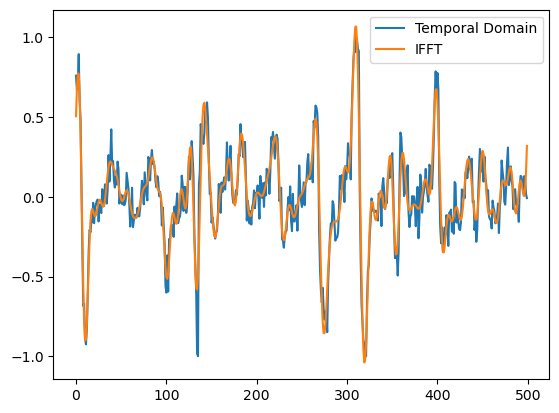

In [108]:
import matplotlib.pyplot as plt
import numpy as np
actions = batch['actions']
a_0 = actions[:,:,0][0,:][:]
a_0_fft = np.fft.fft(a_0)
a_0_fft_clip = a_0_fft
a_0_fft_clip[50:-50] = 0
print(a_0.shape)
a_0_ifft = np.fft.ifft(a_0_fft)
plt.plot(a_0,label='Temporal Domain')
a_0_fft_real = a_0_fft.real[:int(len(a_0_fft)/2)]
a_0_fft_imag = a_0_fft.imag[:int(len(a_0_fft)/2)]
##plt.plot(a_0_fft_real,label = 'Freq Real')
#plt.plot(a_0_fft_imag,label = 'Freq Imag')
plt.plot(a_0_ifft,label = 'IFFT')
#plt.plot(a_0-a_0_ifft,label = 'diff')
#plt.ylim(-1,1)
plt.legend()
#print(np.fft.ifft(np.fft.fft(a_0)) == a_0)

(500,)
0.009831089261417209


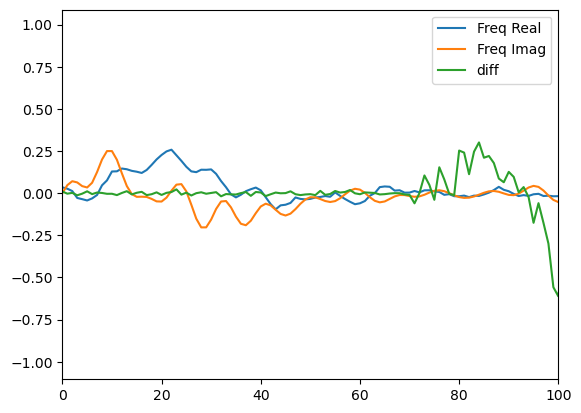

In [162]:
## cooked double fourier thing

import matplotlib.pyplot as plt
import numpy as np
smoothness = 70
actions = batch['actions']
a_0 = actions[:,:,0][0,:][:]
a_0_fft = np.fft.fft(a_0)
weird_thing = np.fft.fft(a_0_fft)
weird_thing[smoothness:-smoothness] = 0
a_0_fft_smooth = np.fft.ifft(weird_thing)+np.random.normal(scale=0.25,size = weird_thing.shape )

print(a_0.shape)
a_0_ifft = np.fft.ifft(a_0_fft_smooth)
#plt.plot(a_0,label='Temporal Domain')
a_0_fft_real = a_0_fft_smooth.real[:int(len(a_0_fft)/2)]
a_0_fft_imag = a_0_fft_smooth.imag[:int(len(a_0_fft)/2)]
plt.plot(a_0_fft_real/40,label = 'Freq Real')
plt.plot(a_0_fft_imag/40,label = 'Freq Imag')
#plt.plot(a_0_ifft,label = 'IFFT')
plt.plot(a_0-a_0_ifft,label = 'diff')
#plt.ylim(-1,1)
plt.legend()
#print(np.fft.ifft(np.fft.fft(a_0)) == a_0)
plt.xlim(0,100)
print(np.mean(np.abs((a_0-a_0_ifft)[0:70])))

(500,)
0.056149936850784586


/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


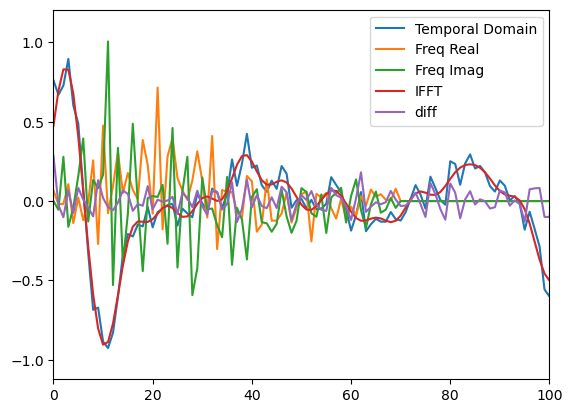

In [161]:
## only a bit cooked single fourier thing

import matplotlib.pyplot as plt
import numpy as np
smoothness = 70
actions = batch['actions']
a_0 = actions[:,:,0][0,:][:]
a_0_fft = np.fft.fft(a_0)
a_0_fft[smoothness:-smoothness] = 0

print(a_0.shape)
a_0_ifft = np.fft.ifft(a_0_fft)
plt.plot(a_0,label='Temporal Domain')
#a_0_fft_real = a_0_fft.real[:int(len(a_0_fft)/2)]
#a_0_fft_imag = a_0_fft.imag[:int(len(a_0_fft)/2)]
plt.plot(a_0_fft_real/40,label = 'Freq Real')
plt.plot(a_0_fft_imag/40,label = 'Freq Imag')
plt.plot(a_0_ifft,label = 'IFFT')
plt.plot(a_0-a_0_ifft,label = 'diff')
#plt.ylim(-1,1)
plt.legend()
#print(np.fft.ifft(np.fft.fft(a_0)) == a_0)
plt.xlim(0,100)
print(np.mean(np.abs((a_0-a_0_ifft)[0:70])))

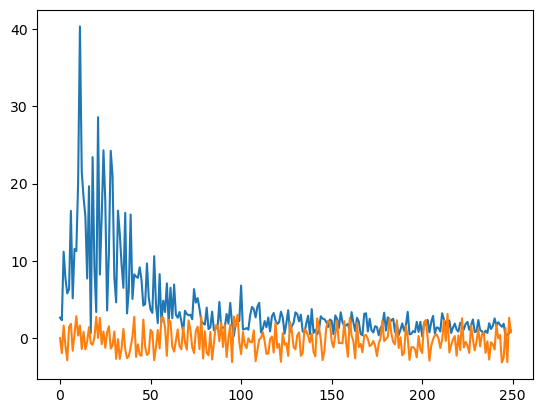

In [98]:
mag = np.sqrt(a_0_fft_imag**2 + a_0_fft_real**2 )
angle = (np.arctan2(a_0_fft_imag, a_0_fft_real))
plt.plot(mag,label = 'Mag')
plt.plot(angle,label = 'angle')

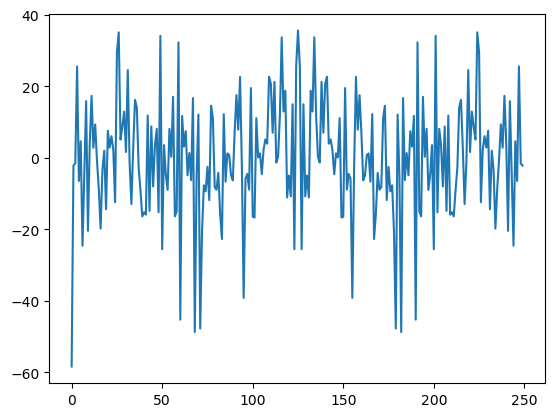

In [100]:
angle_fft = np.fft.fft(angle)
plt.plot(angle_fft.real)

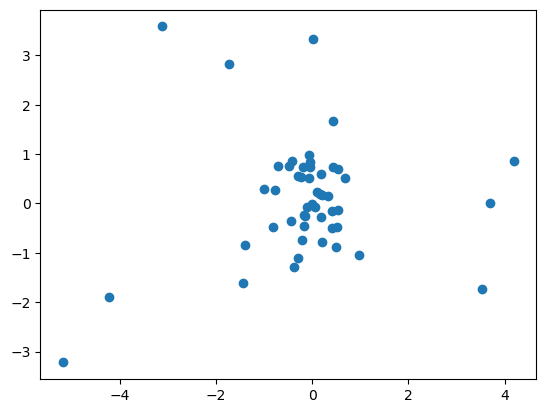

In [83]:
plt.scatter(a_0_fft.real[:int(len(a_0_fft)/2)],a_0_fft.imag[:int(len(a_0_fft)/2)])

/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


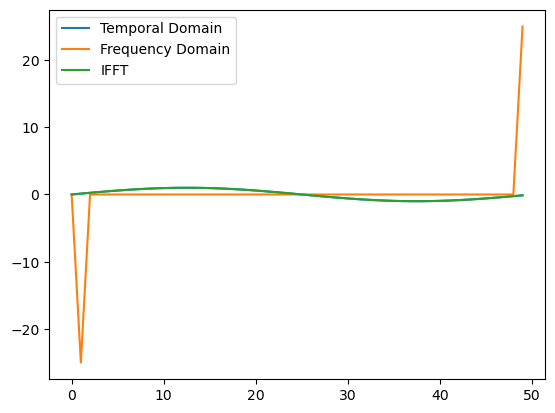

In [54]:
# synthetic data
sin_wave = np.sin(np.arange(0,2*np.pi,(2*np.pi)/50))
sin_wave_fft = np.fft.fft(sin_wave)
sin_wave_ifft = np.fft.ifft(sin_wave_fft)
plt.plot(sin_wave,label='Temporal Domain')
plt.plot(sin_wave_fft.imag,label = 'Frequency Domain')
plt.plot(sin_wave_ifft,label = 'IFFT')
#plt.ylim(-1,1)
plt.legend()

In [ ]:
thing = np.array([0,1,2,3,4,5,6,7,8,9,10])

In [10]:
# more numpy stuff
import numpy as np
thing = np.array([0,1,1,0,1,1,1]).astype(bool)
print(np.mean(thing))

0.7142857142857143


In [7]:
# numpy stuff
import numpy as np
thing = np.ones((2,5,2))
meow = np.ones(2) * 7
thing[:,0,:] = meow
print(thing)



[[[7. 7.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[7. 7.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [1]:
# testing vector env mod to an ogbench utility
from utilities.ogbench_utilities import *


env_name = 'cube-single-play-v0' 
envs, dataset, _ = make_envs_and_datasets(env_name,compact_dataset=False,num_envs = 4)
obs, infos = envs.reset()
obs, info = envs.reset()
print(type(envs))
print(envs.action_space)
print(envs.single_action_space)
print(type(infos))
print(infos['goal'].shape)

/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<class 'gymnasium.vector.async_vector_env.AsyncVectorEnv'>
Box(-1.0, 1.0, (4, 5), float32)
Box(-1.0, 1.0, (5,), float32)
<class 'dict'>
(4, 28)


In [1]:
# testing base ogbench dataloader
from utilities.ogbench_utilities import *
env_name = 'cube-single-play-v0'
from train_inv_dyn import InvDynConfig
config = InvDynConfig()
config.batch_size = 10
env, train_dataset = load_ogbench_data_env(env_name,config)
batch = train_dataset.sample(config.batch_size)

/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [ ]:
# what do the batches look like? 

In [13]:
# testing new sequence dataset
from utilities.ogbench_utilities import *
from gcbc import GCBCTrainConfig
config = GCBCTrainConfig()
config.batch_size = 256
env_name = 'cube-single-play-v0' 
env, dataset, _ = make_env_and_datasets(env_name,compact_dataset=False)
seq_dataset = GCSequenceDataset(dataset, config)
batch = seq_dataset.sample()
print(batch['observations'].shape)
print(batch['actions'].shape)
print(batch['goals'].shape)

Processing trajectories: 100%|██████████| 1000000/1000000 [00:00<00:00, 1381360.62it/s]

(256, 256, 28)
(256, 256, 5)
(256, 28)


In [ ]:
import torch
for i in trange(50000):
    batch = seq_dataset.sample()
    obs = torch.tensor(batch['observations'],device="cuda")
    actions = torch.tensor(batch['actions'],device="cuda")
    goals = torch.tensor(batch['goals'],device="cuda")

In [ ]:
# testing randomness
import numpy as np
low = [-1.0,0,1.0]
high = [5.0,10,50]
print(np.random.uniform(low = low, high = high).astype(int))

# testing another thing
lengths = [5,1,3,6,2]
idx = np.array([1,1,2,4,1,1,1,3,2])
print(idx.shape)
lengths[idx]

In [101]:
0.0 == None

False

In [ ]:
### writing trajectory loader
from utilities.ogbench_utilities import *
from collections import defaultdict

env_name = 'cube-single-play-v0' 
env, dataset, _ = make_env_and_datasets(env_name,compact_dataset=False)
from tqdm import trange
traj, traj_len = [], []
data_ = defaultdict(list)
for i in trange(dataset["observations"].shape[0], desc="Processing trajectories"):
    data_["observations"].append(dataset["observations"][i])
    data_["actions"].append(dataset["actions"][i])
    #data_["rewards"].append(dataset["rewards"][i])

    if dataset["terminals"][i]:
        episode_data = {k: np.array(v, dtype=np.float32) for k, v in data_.items()}
        traj.append(episode_data)
        traj_len.append(episode_data["actions"].shape[0])
        # reset trajectory buffer
        data_ = defaultdict(list)

print(len(traj))
print(len(traj_len))
print(traj_len)

In [107]:
print(np.array(traj).shape)
print(np.array(traj_len).shape)

(1000,)
(1000,)


In [108]:
print(traj[0].keys())
print(traj[0]['actions'].shape)

dict_keys(['observations', 'actions'])
(1000, 5)


In [32]:
### seeing how base data structure works  ###
from utilities.ogbench_utilities import *
env_name = 'cube-single-play-v0' 
env, train_dataset, _ = make_env_and_datasets(env_name,compact_dataset=False)
print(type(train_dataset))
print(train_dataset.keys())
print(len(train_dataset['observations']))
print(len(train_dataset['terminals']))
print(train_dataset['terminals'][8])

/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<class 'dict'>
dict_keys(['observations', 'actions', 'terminals', 'next_observations'])
1000000
1000000
0.0


In [33]:
print(type(train_dataset))
print(train_dataset.keys())
print(len(train_dataset['observations']))
print(len(train_dataset['terminals']))


<class 'dict'>
dict_keys(['observations', 'actions', 'terminals', 'next_observations'])
1000000
1000000
0.0


In [39]:
terminals = train_dataset['terminals']
observations = train_dataset['observations']
term_count = 0
for terminal in terminals:
    if terminal == 1:
        term_count += 1
print(term_count)

1000


In [31]:
1001000/1000

1001.0

In [2]:
### getting OGBench normal dataloader to work ###
from utilities.cleandiffuser.classifier.base import BaseClassifier
from ogbench import *
from utilities.ogbench_utilities import *
from gcbc import TrainConfig
config = TrainConfig()
env_name = 'cube-single-play-v0' 
env, train_dataset = load_ogbench_data_env(env_name,config)
for t in range(int(1)):
    batch = train_dataset.sample(1)
print(type(batch))
print(batch.keys())
for key in batch.keys():
    print('Key:',key, ' || Shape:',batch[key].shape, ' || Type:',type(batch[key])) 

/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/root/miniconda3/envs/gen_stitch/lib/python3.9/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<class 'dict'>
dict_keys(['actions', 'next_observations', 'observations', 'terminals', 'value_goals', 'actor_goals', 'masks', 'rewards'])
Key: actions  || Shape: (1, 5)  || Type: <class 'numpy.ndarray'>
Key: next_observations  || Shape: (1, 28)  || Type: <class 'numpy.ndarray'>
Key: observations  || Shape: (1, 28)  || Type: <class 'numpy.ndarray'>
Key: terminals  || Shape: (1,)  || Type: <class 'numpy.ndarray'>
Key: value_goals  || Shape: (1, 28)  || Type: <class 'numpy.ndarray'>
Key: actor_goals  || Shape: (1, 28)  || Type: <class 'numpy.ndarray'>
Key: masks  || Shape: (1,)  || Type: <class 'numpy.ndarray'>
Key: rewards  || Shape: (1,)  || Type: <class 'numpy.ndarray'>
